# Importar librerías

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Leer imagen

In [4]:
img = cv2.imread('Imagenes\k0015.jpg')

In [5]:
img.shape

(720, 960, 3)

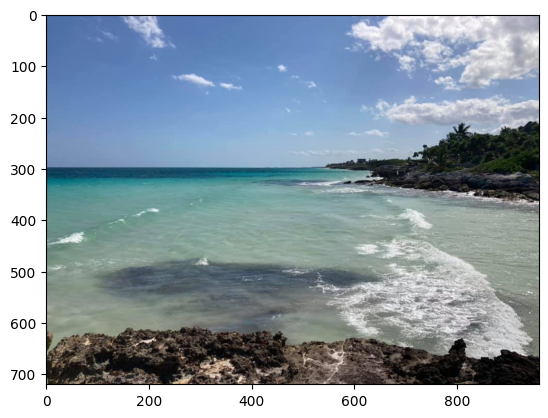

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Función que genere un histograma considerando todos los canales de la imagen

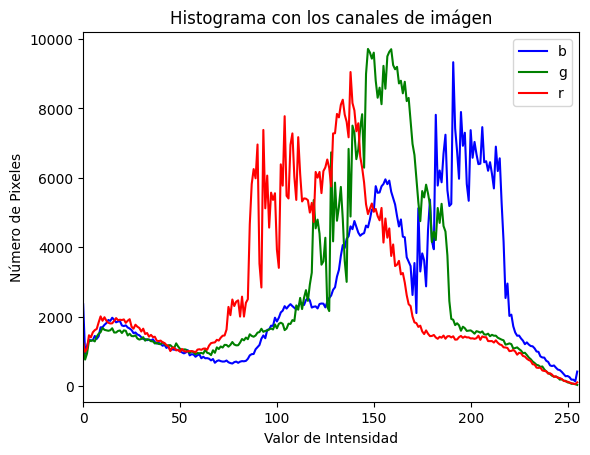

In [7]:
def hist_canals(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color = col, label=col)
        plt.legend()
        plt.xlim([0,256])
        
    plt.xlabel('Valor de Intensidad')
    plt.ylabel('Número de Pixeles')
    plt.title('Histograma con los canales de imágen')
    plt.show()

hist_canals(img)

# Función que genera una subventana de la imagen

In [11]:
x1, y1 = 100, 100  # Coordenadas de la esquina superior izquierda
x2, y2 = 300, 300  # Coordenadas de la esquina inferior derecha

# Recorta la subventana
subventana = img[y1:y2, x1:x2]


# Convierte la subventana a escala de grises utilizando la fórmula NTSC
subventana_escala_de_grises = cv2.cvtColor(subventana, cv2.COLOR_BGR2GRAY)
# Muestra la subventana
cv2.imshow('Subventana en Escala de Grises', subventana_escala_de_grises)
cv2.waitKey(0)
cv2.destroyAllWindows()